

# Exercises

## Q1: I love pip 

- Take a piece of python code you wrote (for instance pick one of the exercises you've done for this class). 
- Turn it into a module
- Install it locally
- Deploy on pypi (only using the test-pypi server!)

In [2]:
import argparse
import numpy as np
import matplotlib.pyplot as plt

**I created the module `mymodule` which contains:**

```
def sincos(x, save_fig=True, plot_type="both"):
    '''Function that calculates the sin and cos of an array x and plots and saves a figure containing the sine, cosine, or both.'''
    
    sin = np.sin(x)
    cos = np.cos(x)

    if save_fig:
        # Plotting both sine and cosine
        if plot_type == "both":
            plt.plot(x, sin, label='sin(x)')
            plt.plot(x, cos, label='cos(x)')
            plt.legend()
            plt.savefig("sincos.pdf")
            print("Figure saved as 'sincos.pdf'")
        
        # Plotting sine only
        elif plot_type == "sin":
            plt.plot(x, sin, label='sin(x)')
            plt.legend()
            plt.savefig("sin.pdf")
            print("Figure saved as 'sin.pdf'")

        # Plotting cosine only
        elif plot_type == "cos":
            plt.plot(x, cos, label='cos(x)')
            plt.legend()
            plt.savefig("cos.pdf")
            print("Figure saved as 'cos.pdf'")

        # Error
        else:
            print("Invalid plot type. Please choose 'sin', 'cos', or 'both'.")
            return
        
        plt.show()
    
    else:
        print("No plot generated.")
    
    return sin, cos

def parse_arguments():
    parser = argparse.ArgumentParser()
    parser.add_argument("--save", help="Save the plot as a PDF (default: True)", action="store_true", default=True)
    parser.add_argument("--plot", help="Type of plot: 'sin', 'cos', or 'both' (default: both)", type=str, default="both")
    return parser.parse_args()


if __name__ == "__main__":
    args = parse_arguments()
    x = np.linspace(0, 2 * np.pi, 100)
    sincos(x, save_fig=args.save, plot_type=args.plot)


# some examples
# python .\mymodule.py -> generates and save sin + cos
# python .\mymodule.py --plot sin -> to generate and save sin only (ex)
# python .\mymodule.py --plot both --no-save -> to generate and not save sin + cos (ex)

```

**Then I organised the directory as follows:**

```
modulescicompclassr
├── modulescicompclassr
│   ├── __init__.py
│   └── mymodule.py
└── README.md
└── setup.py
```

<br>

**`setup.py`:**
```
from setuptools import setup, find_packages

setup(name='modulescicompclassr',
      description='test module for the SciComp class',
      url='https://github.com/racheleguidettii',
      author='Rachele Guidetti',
      author_email='r.guidetti@campus.unimib.it',
      license='MIT',
      version='0.0.1',
      packages=find_packages(),
      install_requires=['numpy', 'matplotlib'])
```
<br>

**while `README.md` and `_init_.py` are empty**

**In the `modulescicompclassr`, I execute** 
```
python setup.py install
python setup.py develop
```

**Installation** 

In [8]:
#pip install C:\Users\guide\Documents\modulescicompclassr

In [9]:
pip show modulescicompclassr

Name: modulescicompclassr
Version: 0.0.1
Summary: test module for the SciComp class
Home-page: https://github.com/racheleguidettii
Author: Rachele Guidetti
Author-email: r.guidetti@campus.unimib.it
License: MIT
Location: C:\Users\guide\anaconda3\Lib\site-packages
Requires: matplotlib, numpy
Required-by: 
Note: you may need to restart the kernel to use updated packages.


**Import**

In [11]:
import sys
sys.path.append(r'C:\Users\guide\Documents\modulescicompclassr')  

import modulescicompclassr
from modulescicompclassr.mymodule import sincos

Figure saved as 'sin.pdf'


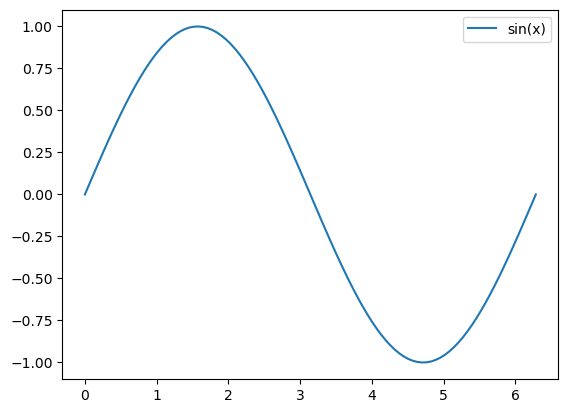

In [12]:
# array 
x = np.linspace(0, 2 * np.pi, 100)

# using the module
sin, cos = sincos(x, save_fig=True, plot_type="sin")

**The figure was succesfully saved**

## Q2: My own test

- Pick a piece of python code that you like (your own PhD project, or take one of the exercises from this class). Implement a unit test and a regression test. 
- Put it under git version control, and write a github action that runs the tests at every commit.
- Edit the github options to make sure the code *cannot* be committed if the tests fail (that's a common thing for big projects with many collaborations, nobody is allowed to break the code)



I create the `gravitational_force.py` file as:

```
G = 6.67430e-11 

def gravitational_force(m1, m2, r):
    """Calculate the gravitational force between two masses m1 and m2 separated by distance r."""
    if r == 0:
        raise ValueError("Distance between objects cannot be zero.")
    return G * (m1 * m2) / r**2
```

Then I create the `test_gravitational_force.py` file as:

```
import pytest
from gravitational_force import gravitational_force

def test_gravitational_force_unit():
    """Unit test for the gravitational_force function."""
    # Testing a case with simple, easy-to-calculate values
    result = gravitational_force(10.0, 20.0, 2.0)  # Expected: G * (10 * 20) / (2^2)
    expected = 6.67430e-11 * (10 * 20) / (2 ** 2)
    assert result == pytest.approx(expected, rel=1e-5)

def test_gravitational_force_regression():
    """Regression test for gravitational_force using a previously verified result."""
    # Known values from past tests (e.g., stored in documentation or logs)
    result = gravitational_force(5.0, 5.0, 1.0)  # Known result: G * (5 * 5) / 1^2
    expected = 6.67430e-11 * (5 * 5) / (1 ** 2)
    assert result == pytest.approx(expected, rel=1e-5)


```

On the terminal, I run:

```
    pytest test_gravitational_force.py -v

```

```
PS C:\Users\guide\Downloads> pytest test_gravitational_force.py -v
====================== test session starts ======================
platform win32 -- Python 3.13.1, pytest-8.3.4, pluggy-1.5.0 -- C:\Users\guide\AppData\Local\Programs\Python\Python313\python.exe
cachedir: .pytest_cache
rootdir: C:\Users\guide\Downloads
plugins: typeguard-4.3.0
collected 2 items

test_gravitational_force.py::test_gravitational_force_unit PASSED                                                [ 50%]
test_gravitational_force.py::test_gravitational_force_regression PASSED                                          [100%]

======================== 2 passed in 0.04s ========================
```

Now I create a directory `.github/workflows` and inside it I create the file `runcheck.yml` containing

```
name: Run tests at every commit
run-name: ${{ github.actor }} is running the test at every commit

on: [push]

jobs:
  Run-Tests:
    runs-on: ubuntu-latest

    steps:
      # Step 1: Check out the repository
      - name: Check out repository code
        uses: actions/checkout@v4

      # Step 2: Set up Python environment
      - name: Set up Python
        uses: actions/setup-python@v4
        with:
          python-version: 3.10  # Specifica una versione Python compatibile

      # Step 3: Install dependencies
      - name: Install dependencies
        run: |
          python -m pip install --upgrade pip
          pip install pytest  # Installa pytest (aggiungi altre dipendenze se necessarie)

      # Step 4: Run the tests
      - name: Run tests
        run: |
          pytest

```

I pushed eveything on github and I edited the github branch options so that the `gravitational_force.py` code cannot be committed if the tests fail 

Then i introduced an error in the `gravitational_force.py` code:
```
G = 6.67430e-11 

def gravitational_force(m1, m2, r):
    """Calculate the gravitational force between two masses m1 and m2 separated by distance r."""
    if r == 0:
        raise ValueError("Distance between objects cannot be zero.")
    #return G * (m1 * m2) / r**2
    return G * (m1 ** m2) * r**2   <-------------------------------ERROR
```

I pushed it on github and created a pull request, which failed.



<img src="failed.png" alt="Failed succesfully" width="800"/>
